In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [ ]:
# set the base directory path
BASE_DIR = "/content/drive/MyDrive/CSE 281"
ANALYSIS_DIR = os.path.join(BASE_DIR, "analysis")

# create analysis directory if it doesn't exist
if not os.path.exists(ANALYSIS_DIR):
    os.makedirs(ANALYSIS_DIR)
    print(f"Created analysis directory at: {ANALYSIS_DIR}")
else:
    print(f"Analysis directory already exists at: {ANALYSIS_DIR}")

# set up matplotlib style for publication quality
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.figsize': (10, 6),
    'axes.grid': True,
    'grid.alpha': 0.3
})

Analysis directory already exists at: /content/drive/MyDrive/CSE 281/analysis


In [ ]:
# load the DataFrame from the pickle file
df = pd.read_pickle("/content/drive/MyDrive/CSE 280/WattBuyData1999_2024.pkl")

# set start and end year
start_year = 2016
end_year = 2024


In [ ]:
# filter by start and end year using the created_at column
df_filtered = df[(df['created_at'].dt.year >= start_year) &
                (df['created_at'].dt.year <= end_year)]

# filter by rate type and non-null supplier names
df_filtered = df_filtered[
    (df_filtered['utility_rate_type'] == 'default rate') &
    (df_filtered['supplier_name'].notna())
]

# drop utility-related columns as we're focusing on supplier plans
df_filtered = df_filtered.drop(columns=[
    'utility_id', 'utility_name', 'utility_rate_type',
    'utility_rate_from_value', 'utility_rate_to_value', 'utility_rate_amount'
])

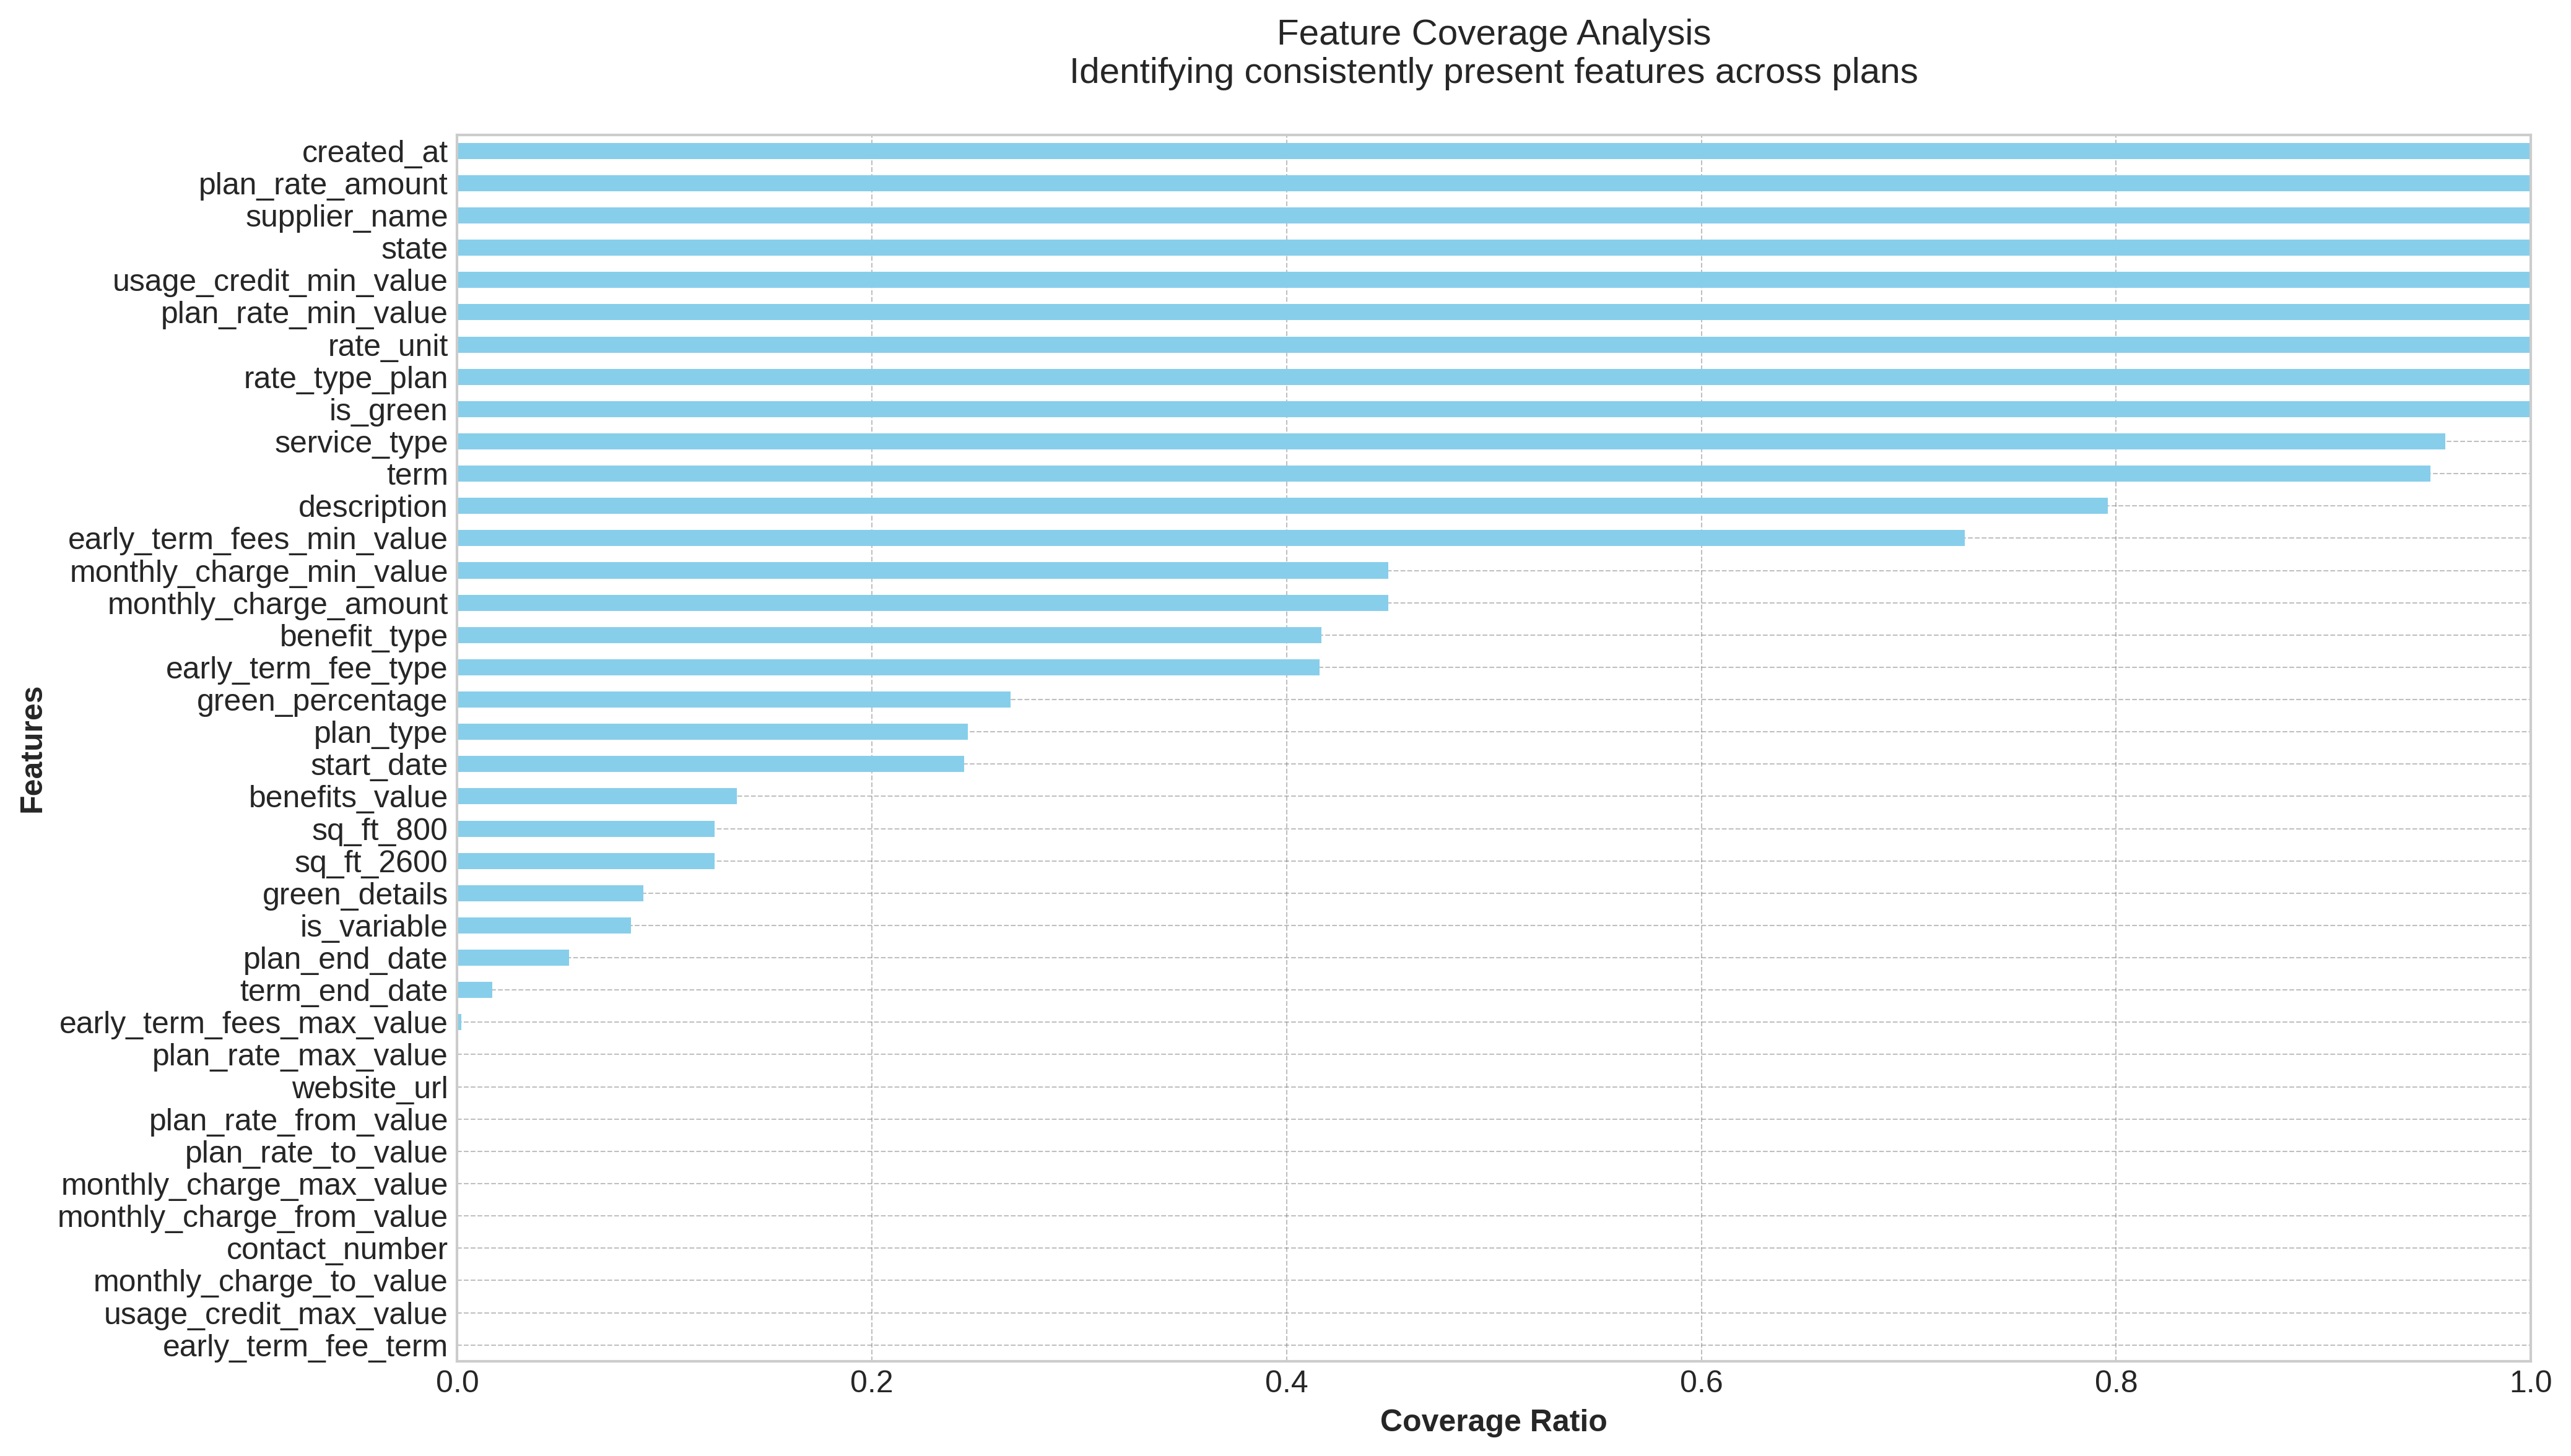

In [ ]:
# calculate the coverage ratio for each feature
coverage_ratio = 1 - (df_filtered.isna().sum() / len(df_filtered))

# create coverage ratio plot
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

# create horizontal bar plot
coverage_ratio.sort_values().plot(kind='barh', color='skyblue', ax=ax)

# customize the plot
ax.set_title('Feature Coverage Analysis\nIdentifying consistently present features across plans',
             fontsize=14, pad=20)
ax.set_xlabel('Coverage Ratio', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_xlim(0, 1)

# add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# tight layout
plt.tight_layout()

# # save the figure
plt.savefig(os.path.join(ANALYSIS_DIR, "feature_coverage_analysis.png"),
            bbox_inches='tight',
            dpi=300)

# display the plot
plt.show()

In [ ]:
# columns to exclude
exclude_columns = ['created_at', 'state', 'supplier_name', 'rate_unit',
                  'start_date', 'plan_end_date', 'website_url',
                  'contact_number', 'benefits_value', 'is_green','description', 'plan_rate_amount','sq_ft_800','sq_ft_2600','term_end_date','benefit_type',
                  'green_details','green_percentage','usage_credit_max_value','usage_credit_min_value','early_term_fees_max_value',
                   'is_variable','plan_type','plan_rate_min_value','plan_rate_max_value','plan_rate_from_value','monthly_charge_max_value','monthly_charge_from_value','monthly_charge_to_value',
                   'plan_rate_to_value','early_term_fee_term','monthly_charge_min_value']

# get remaining columns
analysis_columns = [col for col in df_filtered.columns if col not in exclude_columns]

# create dictionary to store value counts for each column
value_counts = {}

# calculate value counts for each column
for col in analysis_columns:
    counts = df_filtered[col].value_counts(dropna=False).to_dict()
    # convert numpy types to native python types for better display
    counts = {str(k): int(v) for k, v in counts.items()}
    value_counts[col] = counts

# print results
for col, counts in value_counts.items():
    print(f"\n{col}:")
    for value, count in counts.items():
        print(f"  {value}: {count}")
    print("-" * 50)


rate_type_plan:
  fixed: 2959
  variable: 274
  unlimited: 39
--------------------------------------------------

term:
  12.0: 1138
  24.0: 480
  6.0: 430
  3.0: 308
  18.0: 232
  nan: 158
  36.0: 150
  9.0: 94
  1.0: 88
  14.0: 69
  15.0: 30
  4.0: 26
  13.0: 17
  16.0: 14
  8.0: 12
  5.0: 11
  11.0: 6
  17.0: 4
  7.0: 2
  28.0: 1
  27.0: 1
  30.0: 1
--------------------------------------------------

service_type:
  residential: 3137
  nan: 135
--------------------------------------------------

monthly_charge_amount:
  nan: 1803
  0.0: 1257
  495.0: 43
  741.0: 40
  3000.0: 31
  999.0: 24
  529.0: 22
  1500.0: 18
  995.0: 14
  3100.0: 11
  595.0: 3
  500.0: 3
  499.0: 2
  799.0: 1
--------------------------------------------------

early_term_fees_min_value:
  nan: 893
  0.0: 889
  1000.0: 584
  5000.0: 228
  15000.0: 177
  9900.0: 101
  7500.0: 73
  12500.0: 61
  4500.0: 38
  10000.0: 35
  20000.0: 34
  2500.0: 33
  12000.0: 21
  9500.0: 20
  1250.0: 15
  6000.0: 14
  8000.0: 12


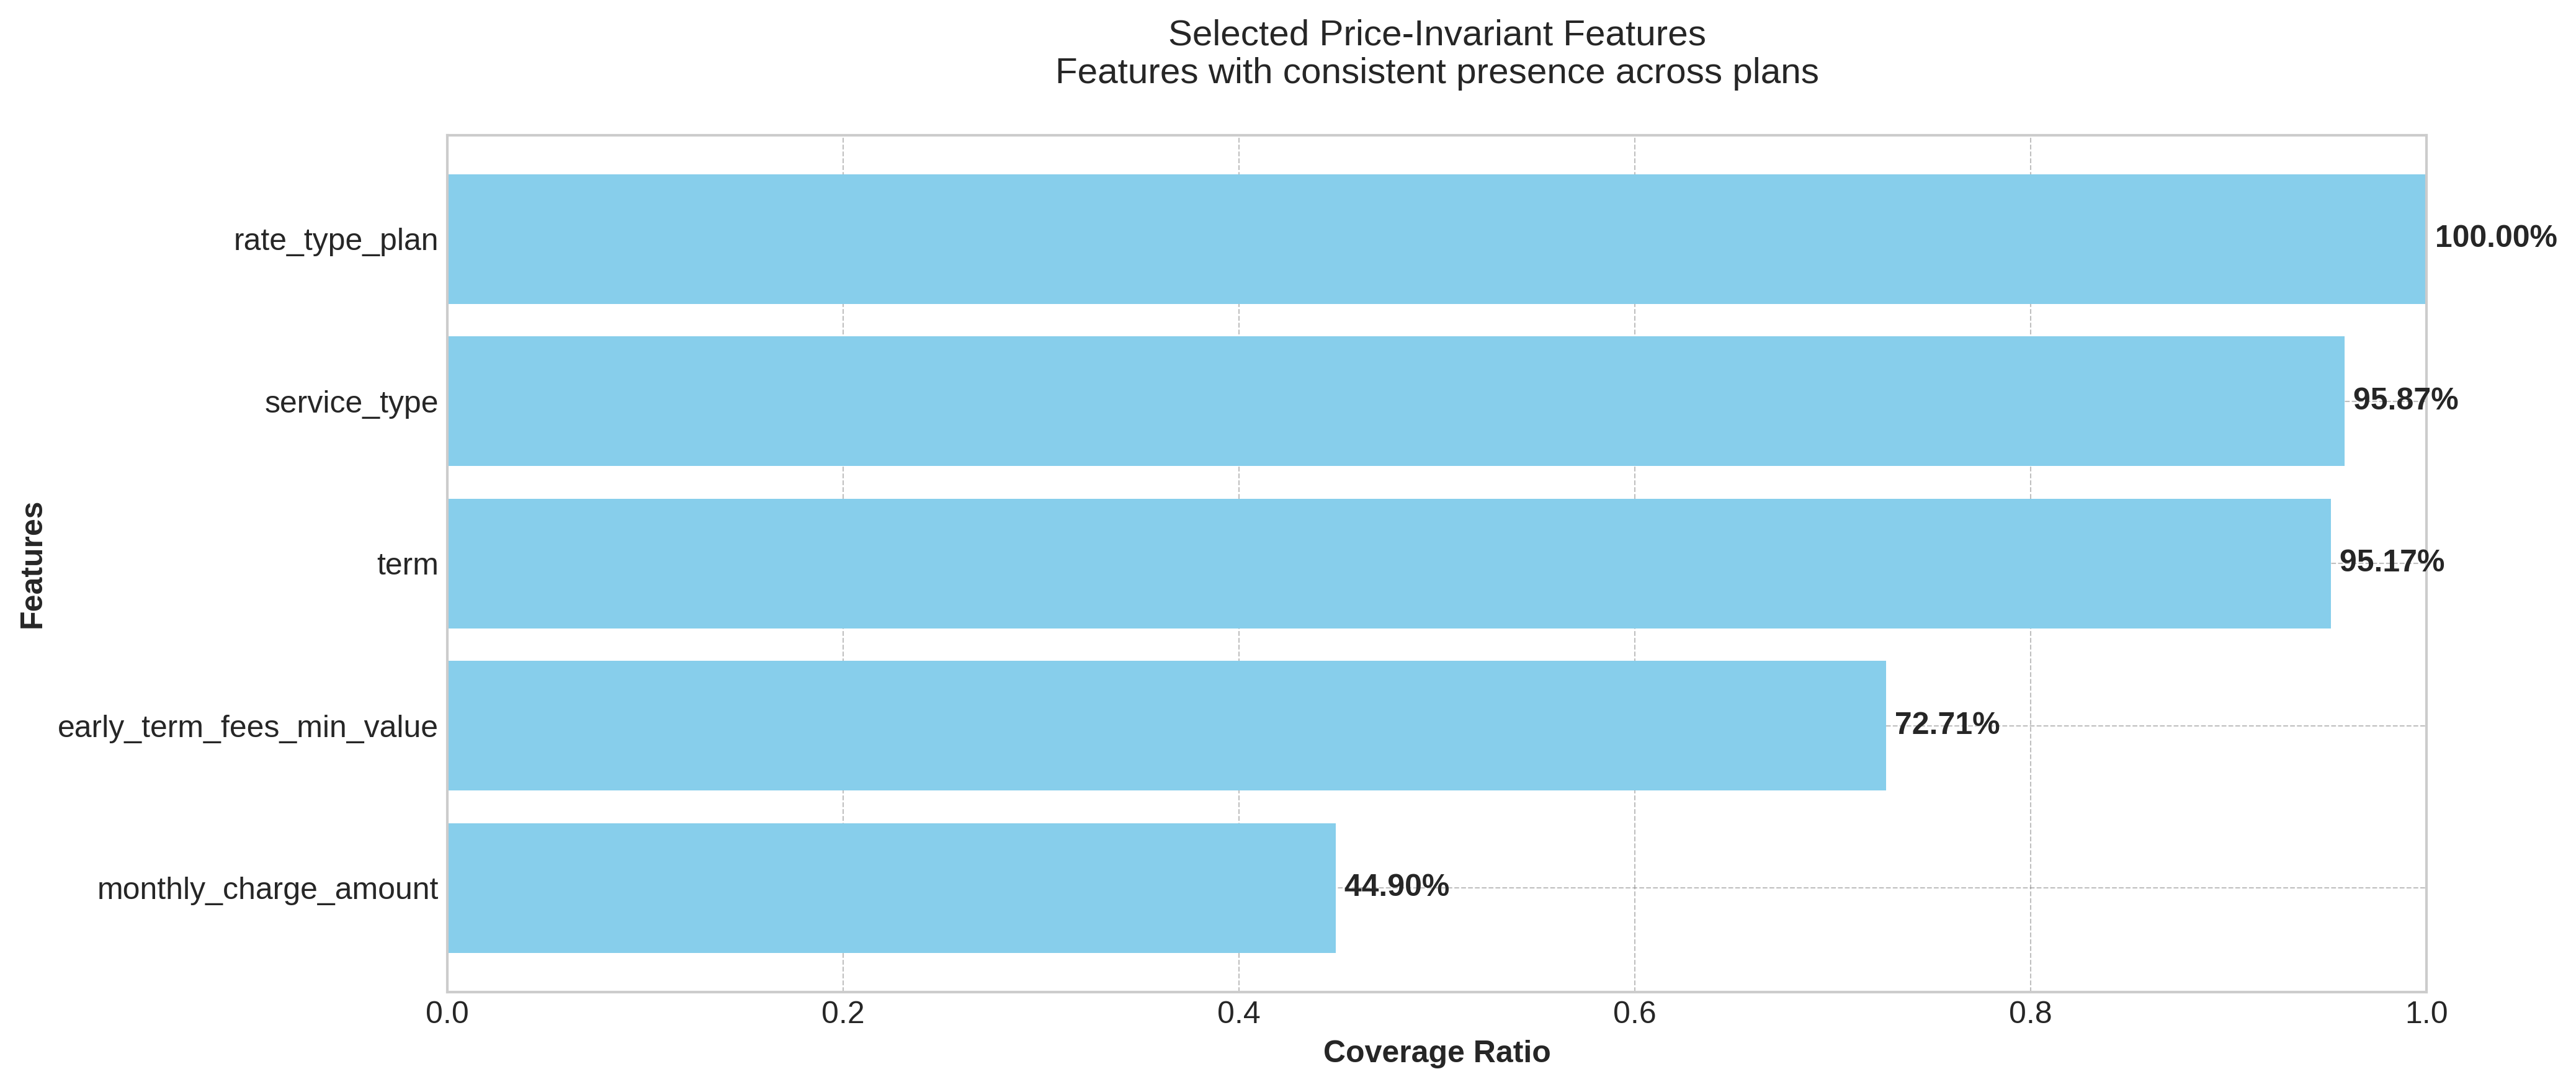

In [ ]:
# define selected invariant features
invariant_features = ['rate_type_plan', 'term', 'service_type', 'monthly_charge_amount','early_term_fees_min_value']

# extract coverage ratios for selected features
selected_coverage = coverage_ratio[invariant_features].sort_values(ascending=True)

# create figure and axis
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)

# create horizontal bar plot
bars = ax.barh(range(len(selected_coverage)), selected_coverage, color='skyblue')

# customize the plot
ax.set_title('Selected Price-Invariant Features\nFeatures with consistent presence across plans',
             fontsize=14, pad=20)
ax.set_xlabel('Coverage Ratio', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_yticks(range(len(selected_coverage)))
ax.set_yticklabels(selected_coverage.index)
ax.set_xlim(0, 1)

# add value labels on the bars
for i, v in enumerate(selected_coverage):
    ax.text(v, i, f' {v:.2%}', va='center', fontweight='bold')

# add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# tight layout
plt.tight_layout()

# save the figure
plt.savefig(os.path.join(ANALYSIS_DIR, "selected_invariant_features.png"),
            bbox_inches='tight',
            dpi=300)

# display the plot
plt.show()

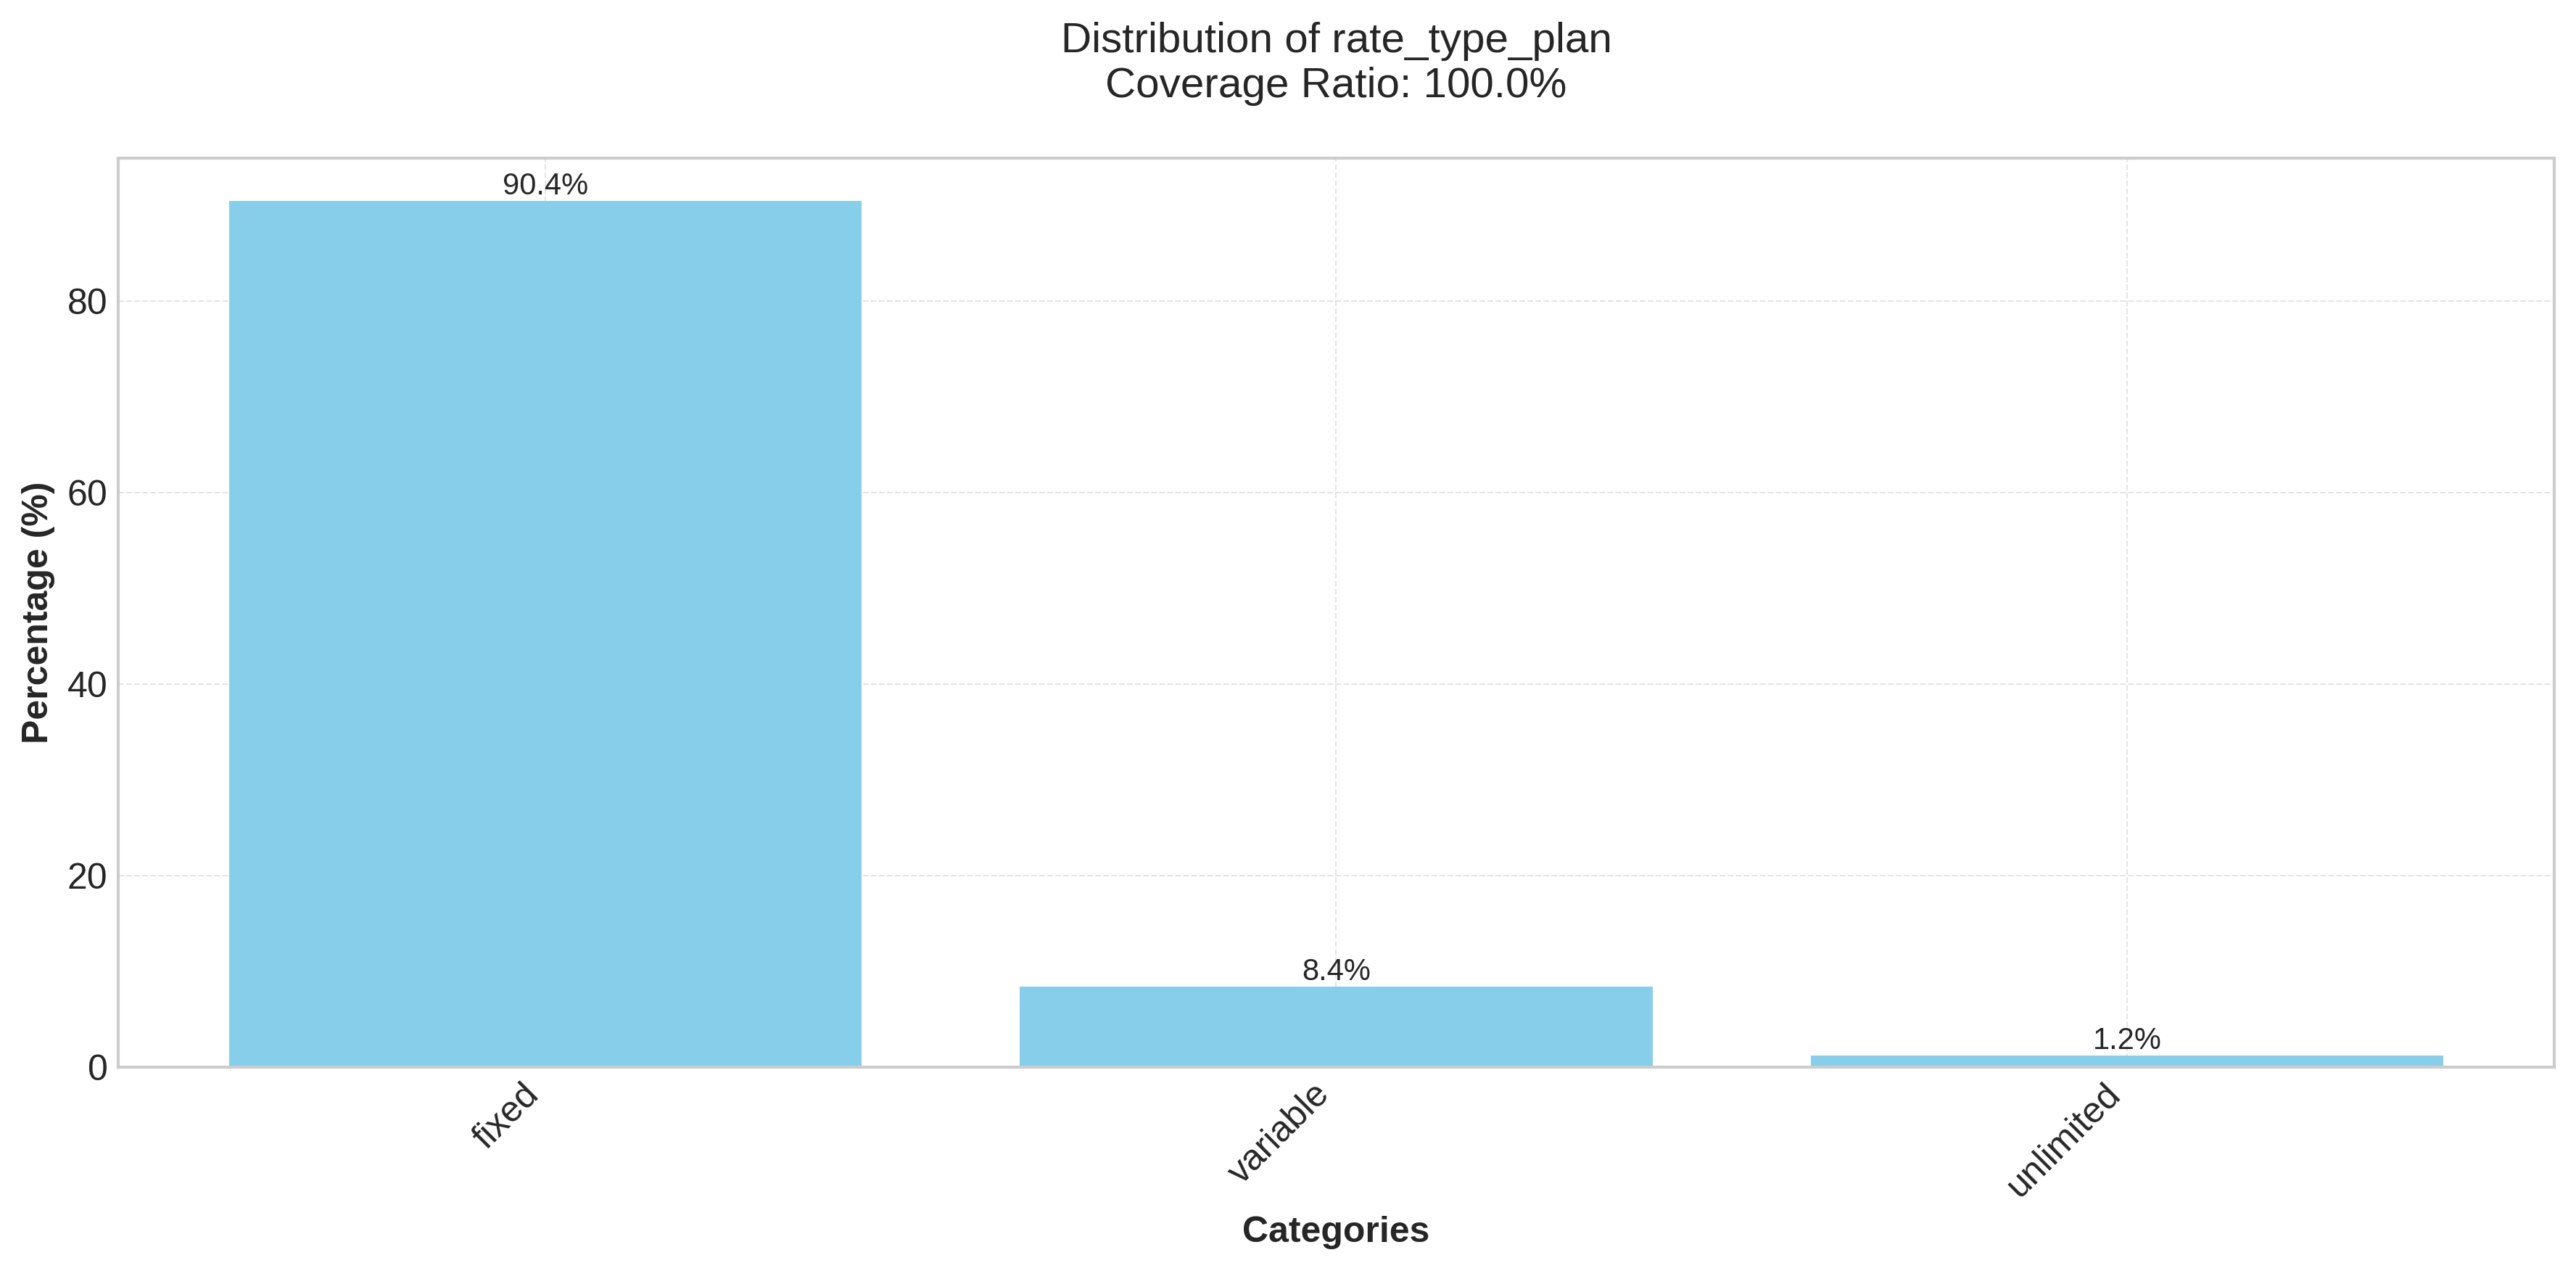

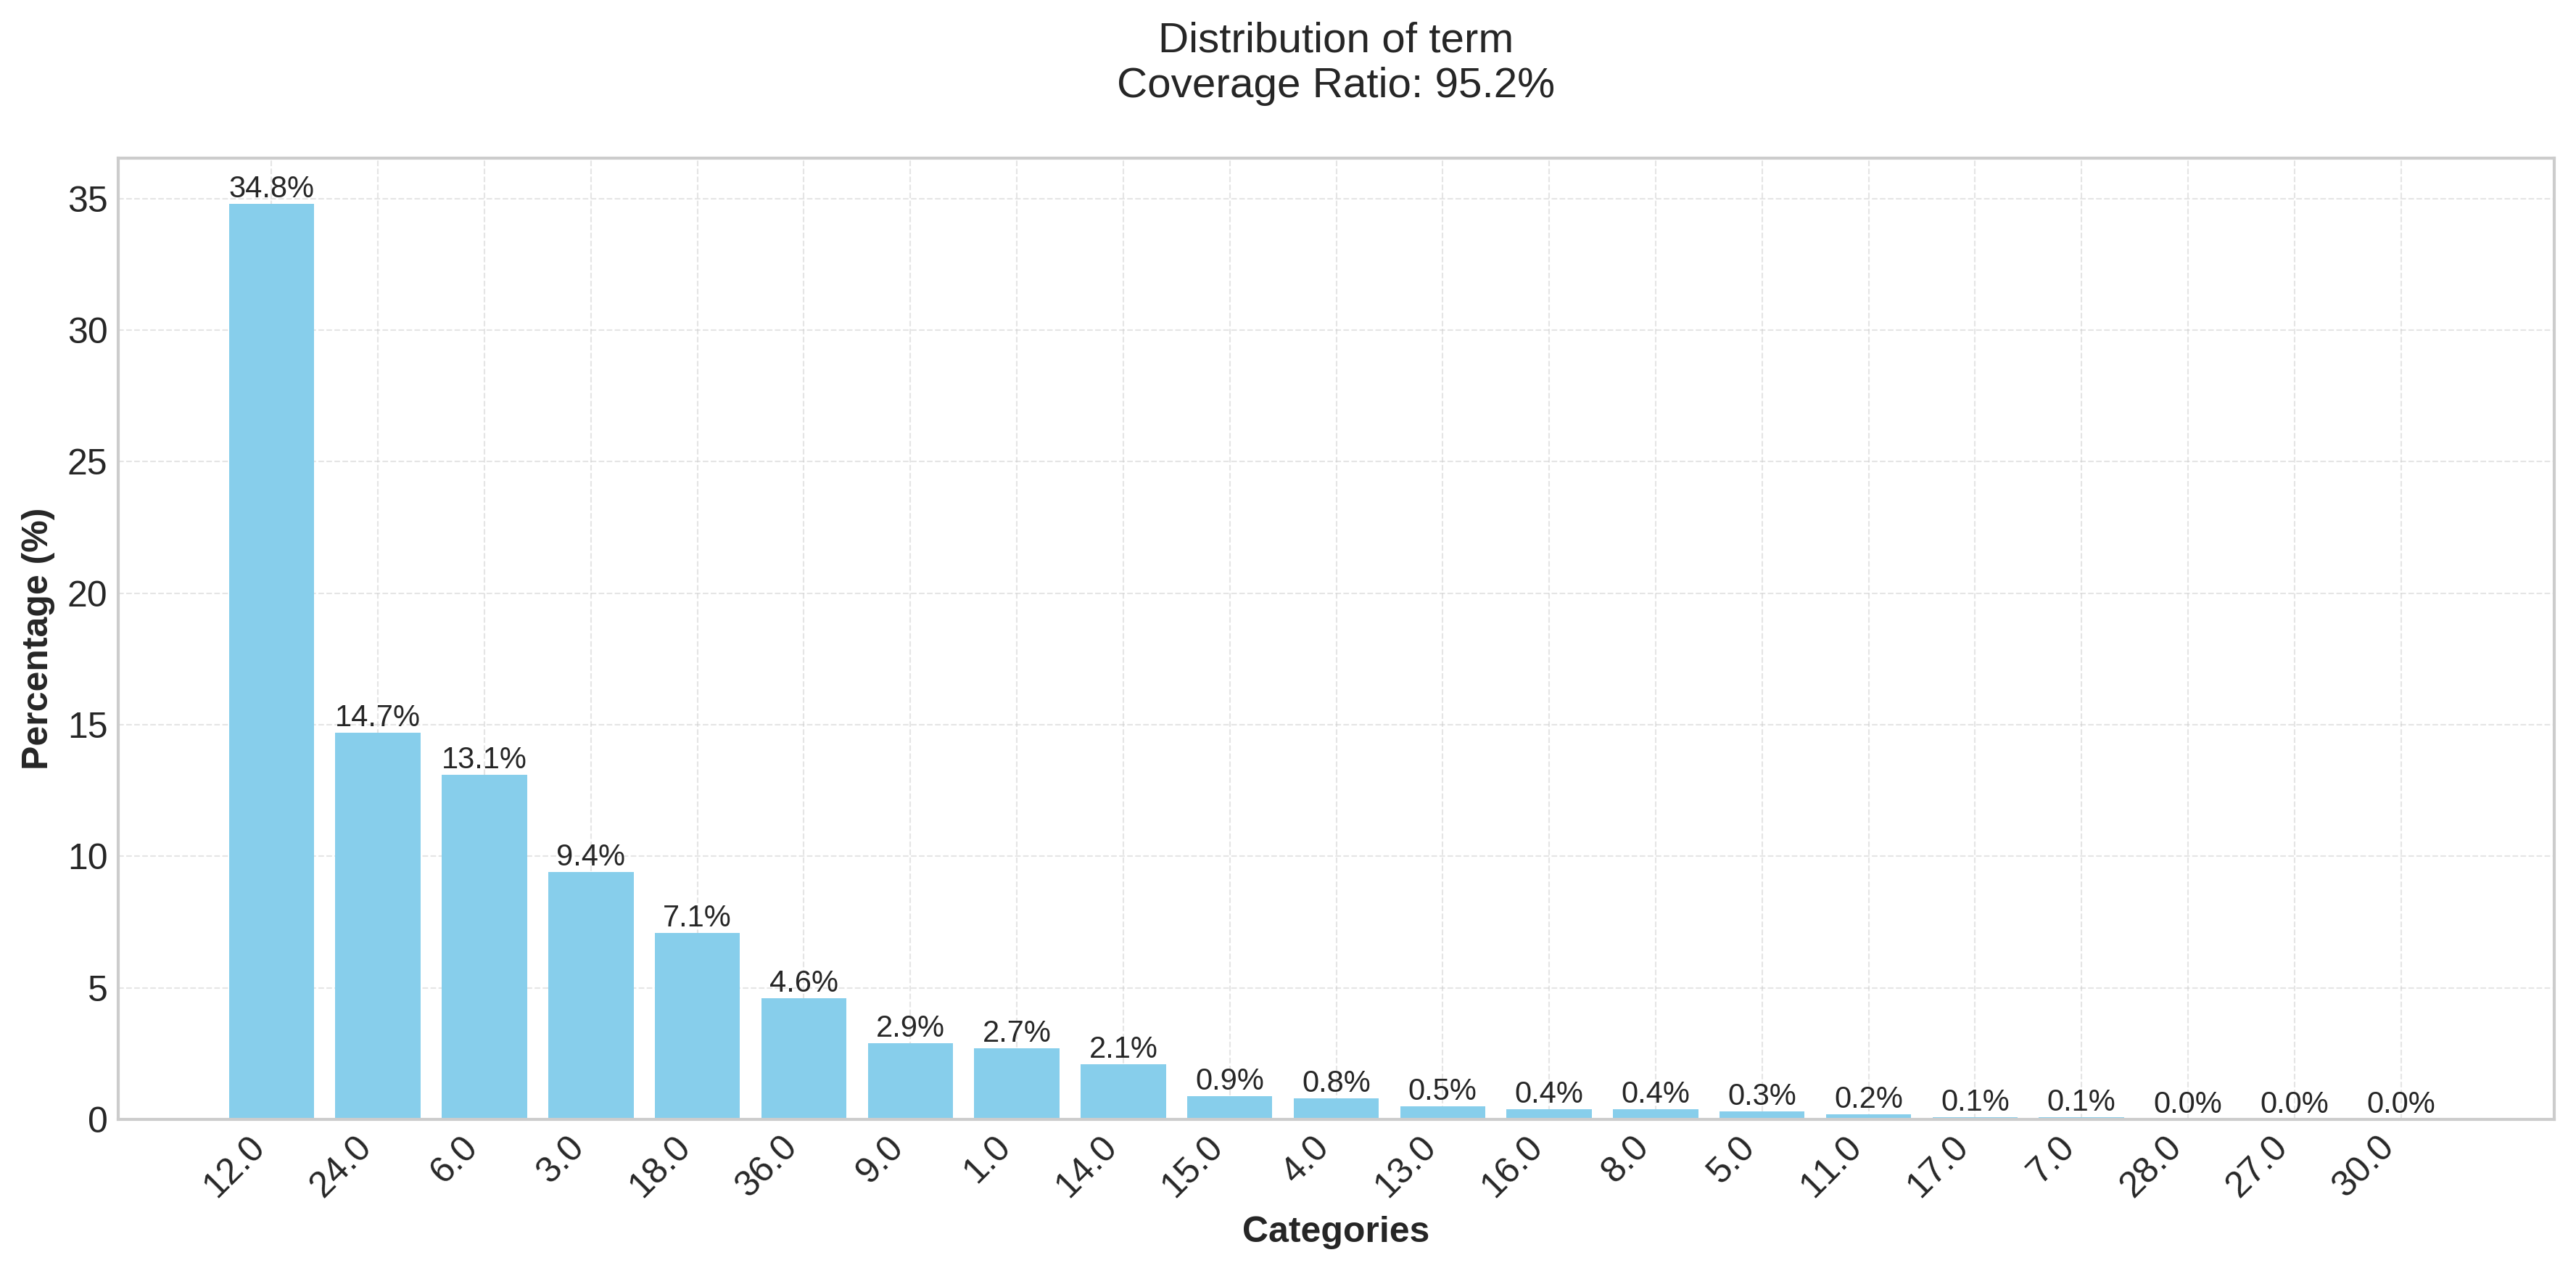

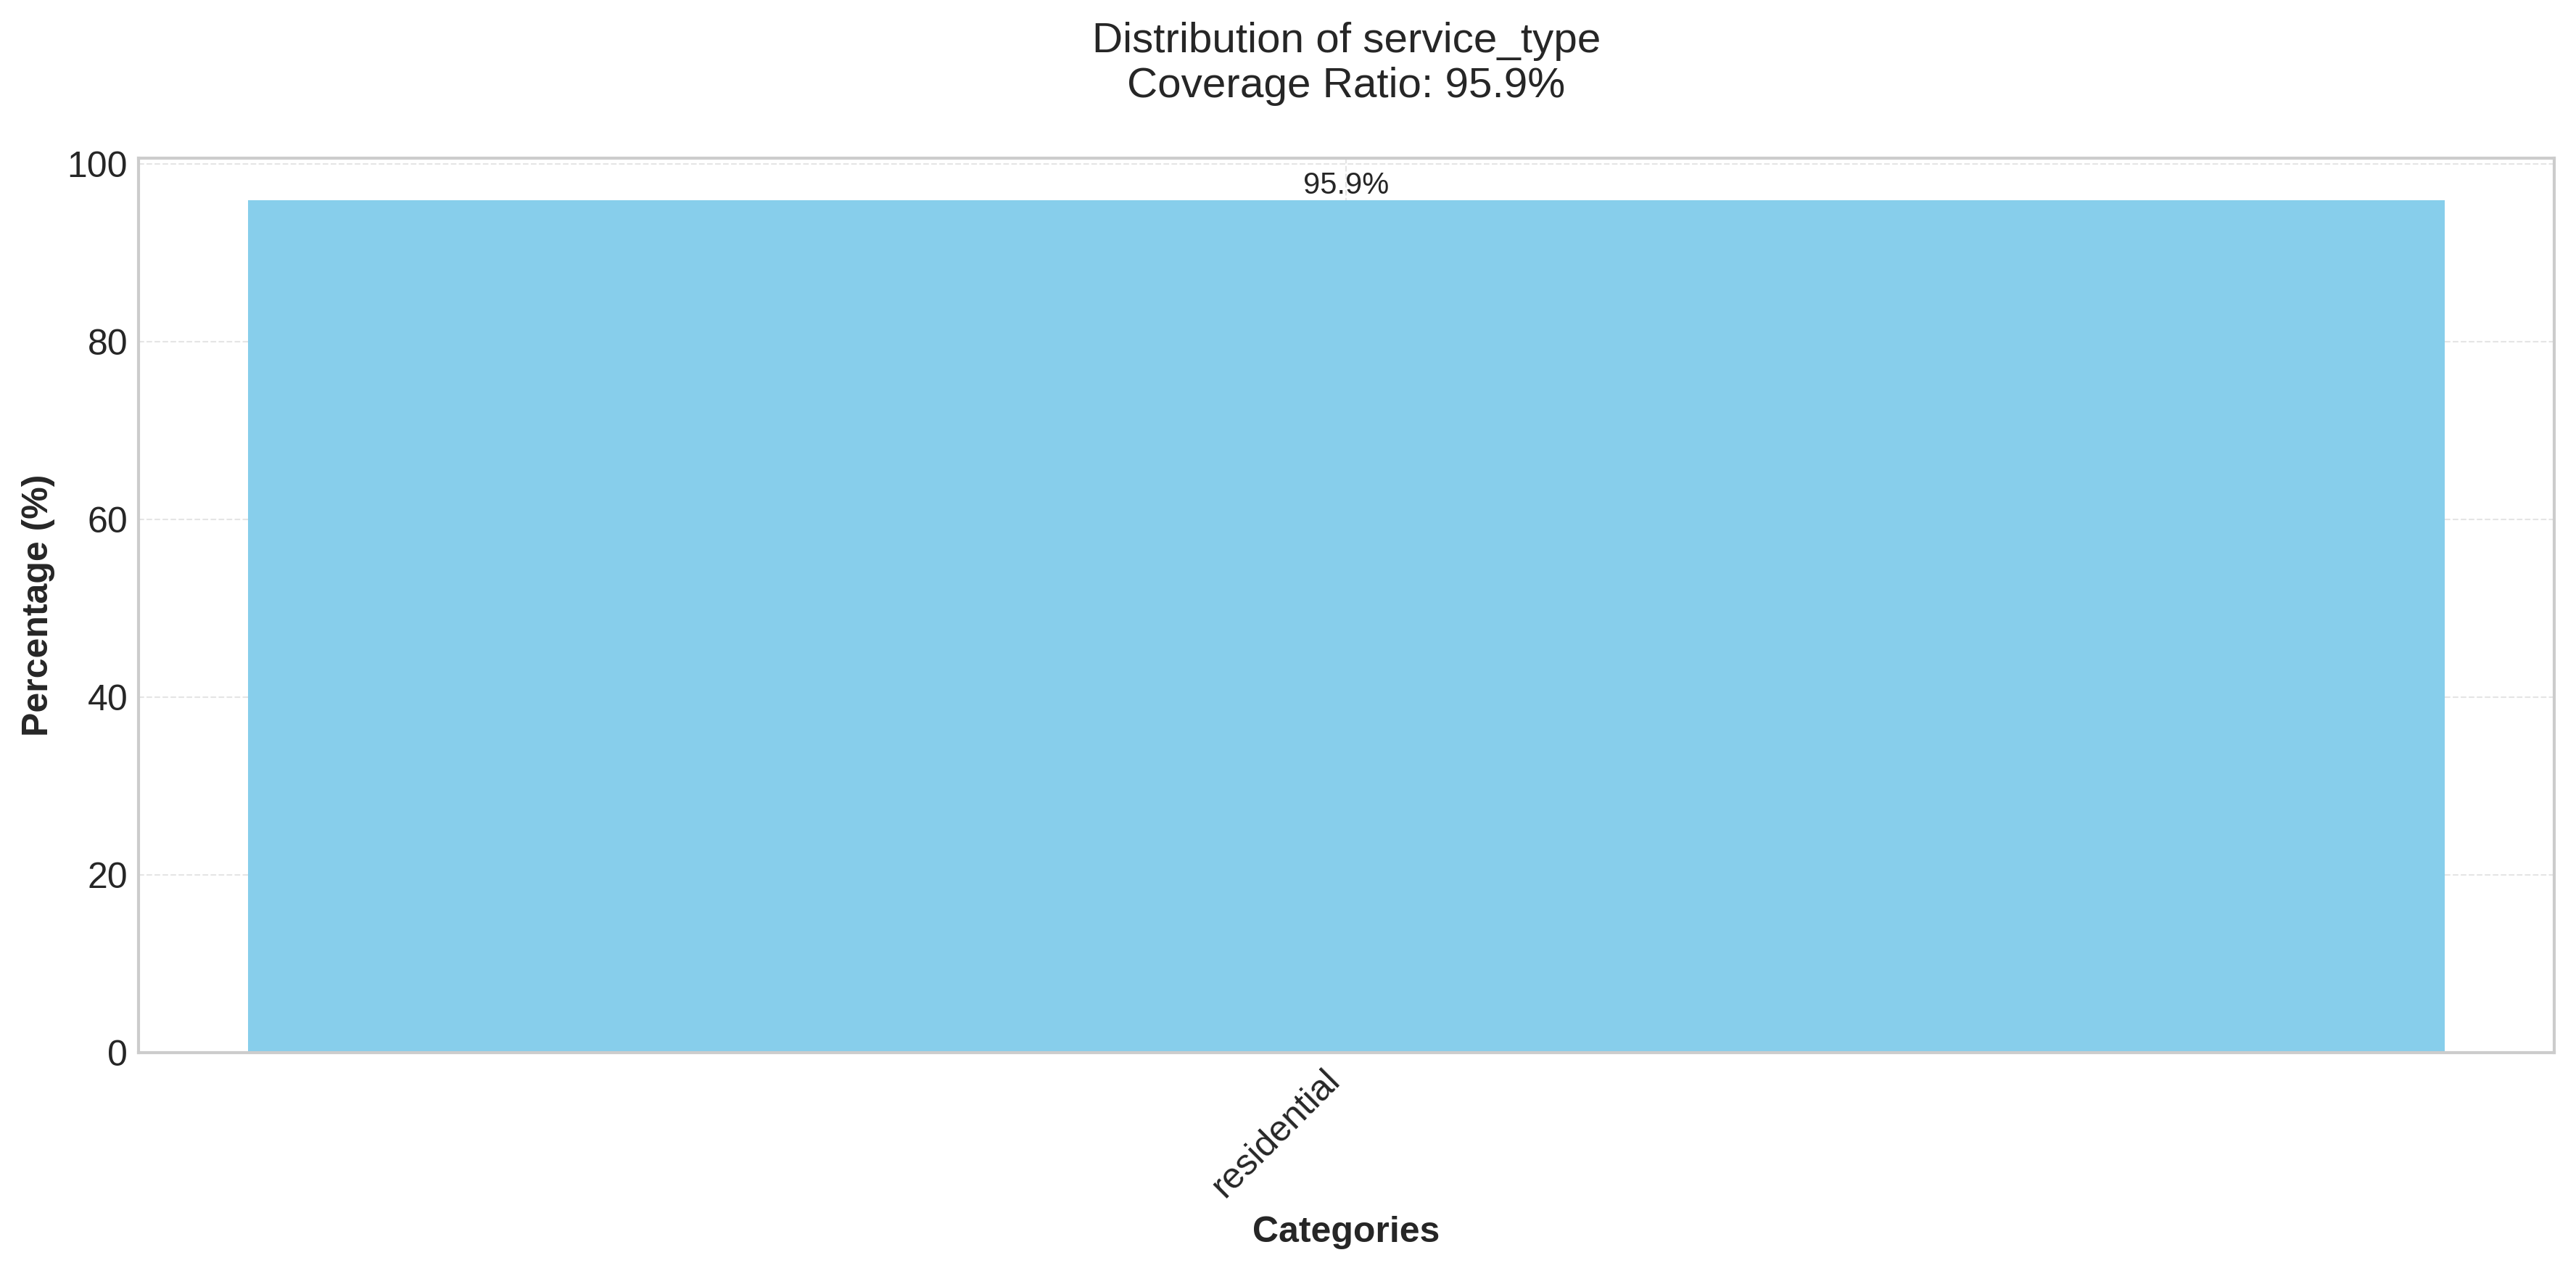

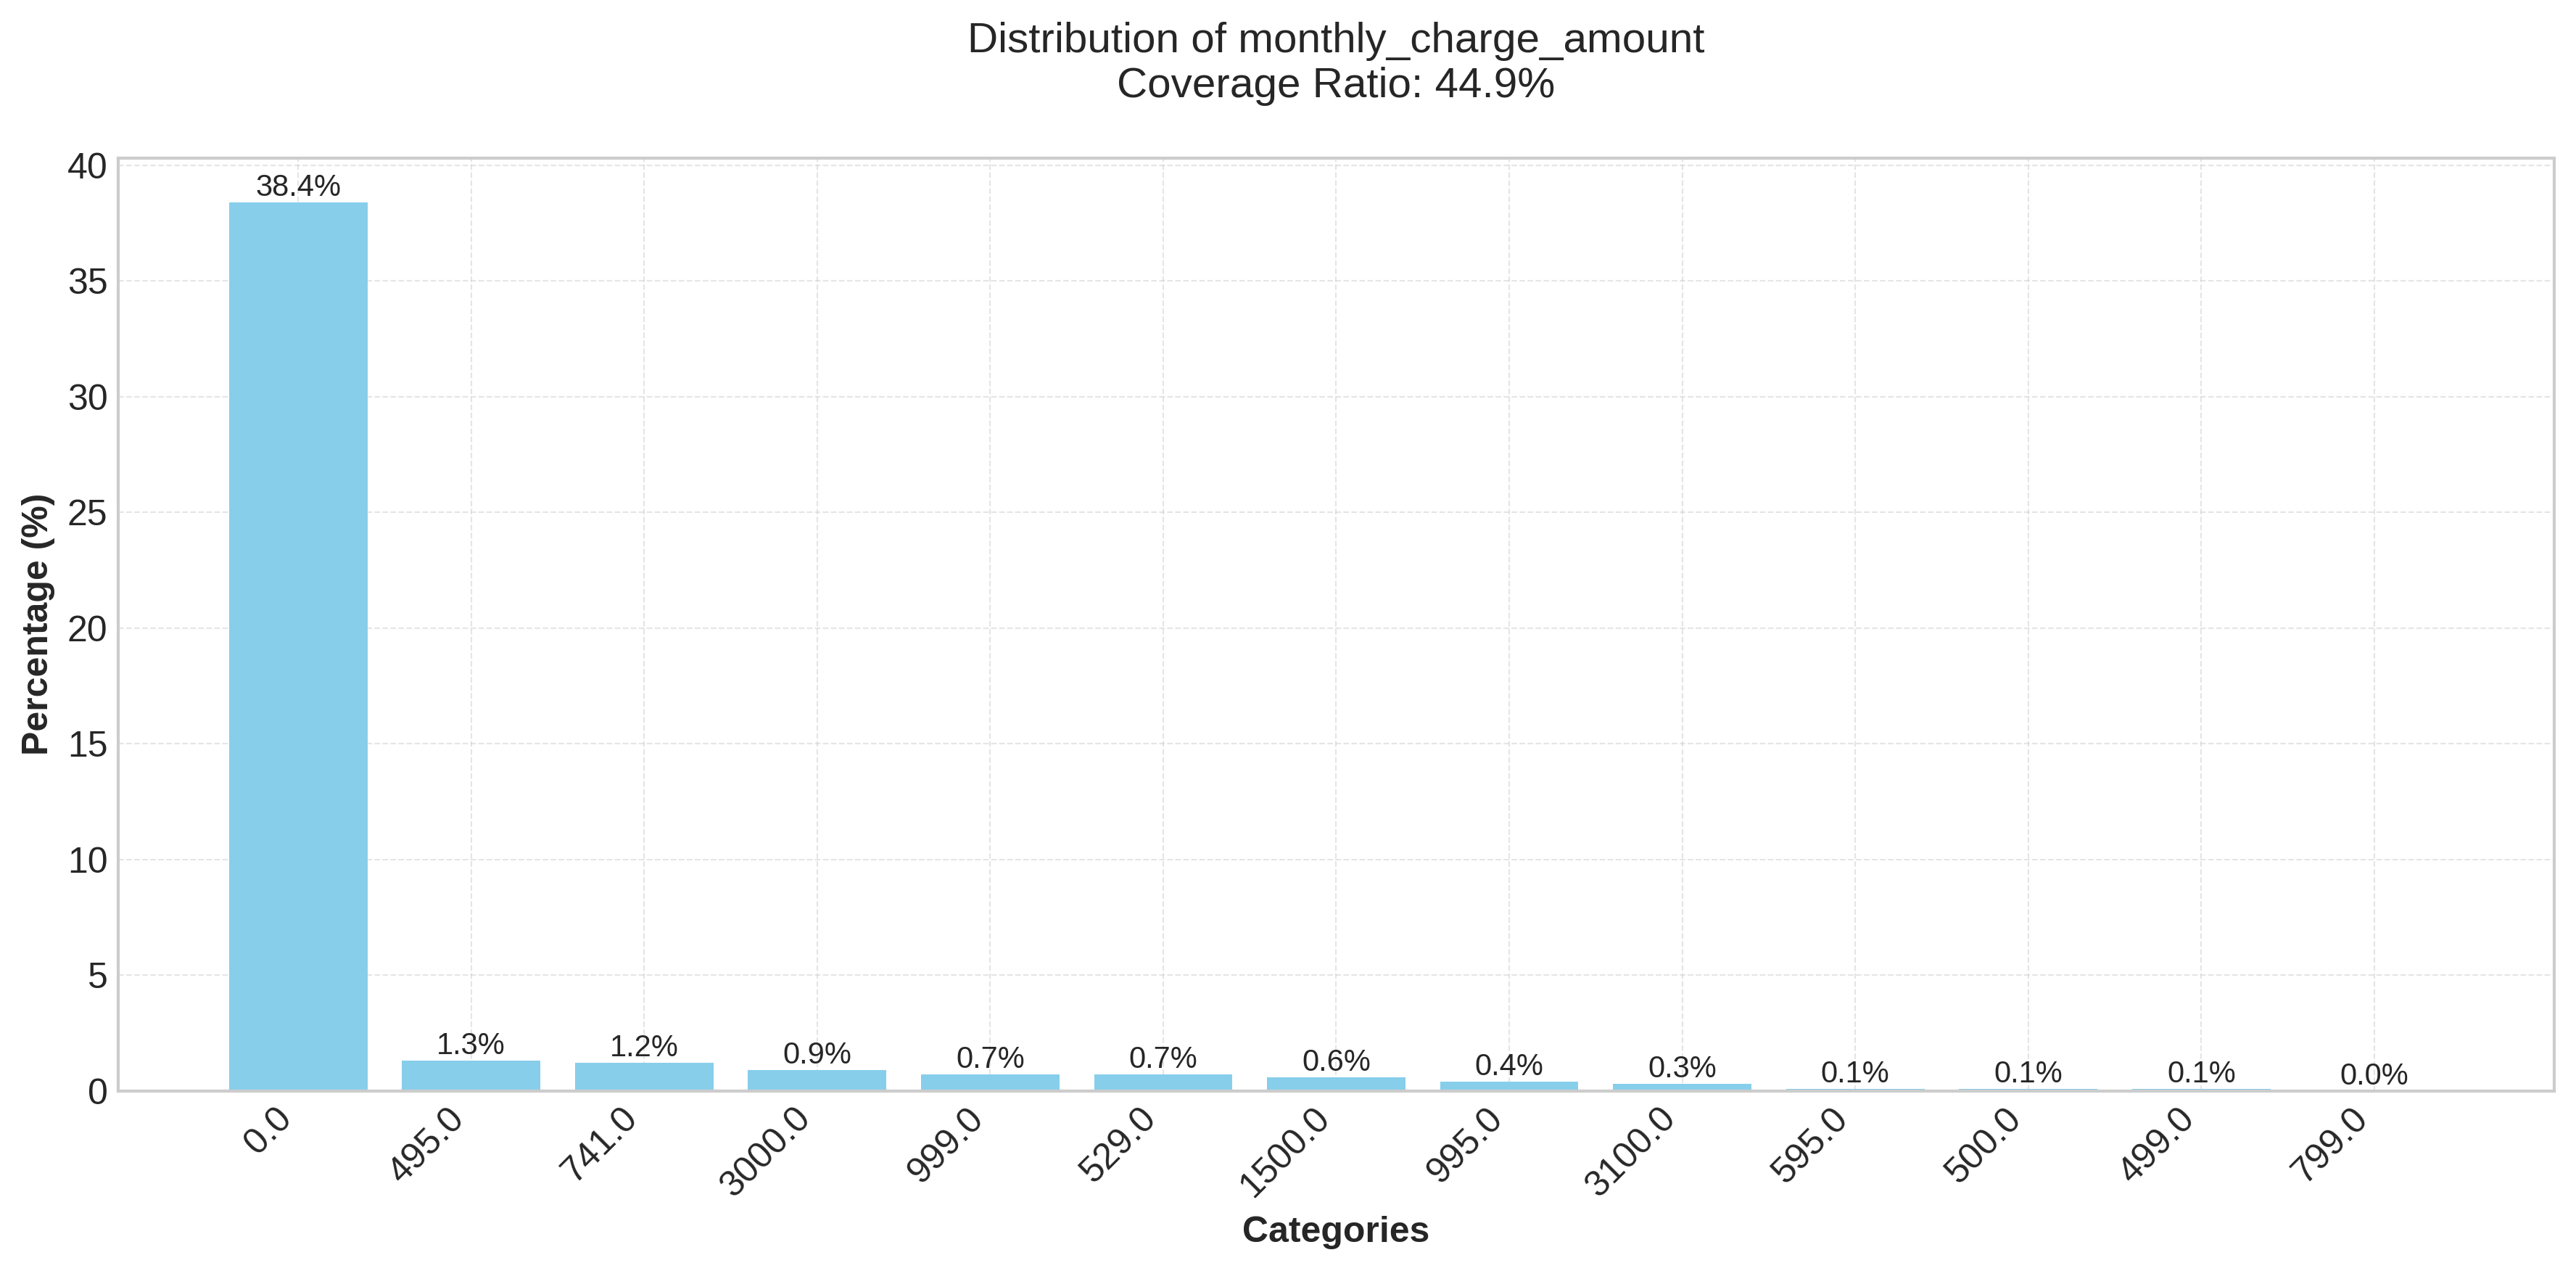

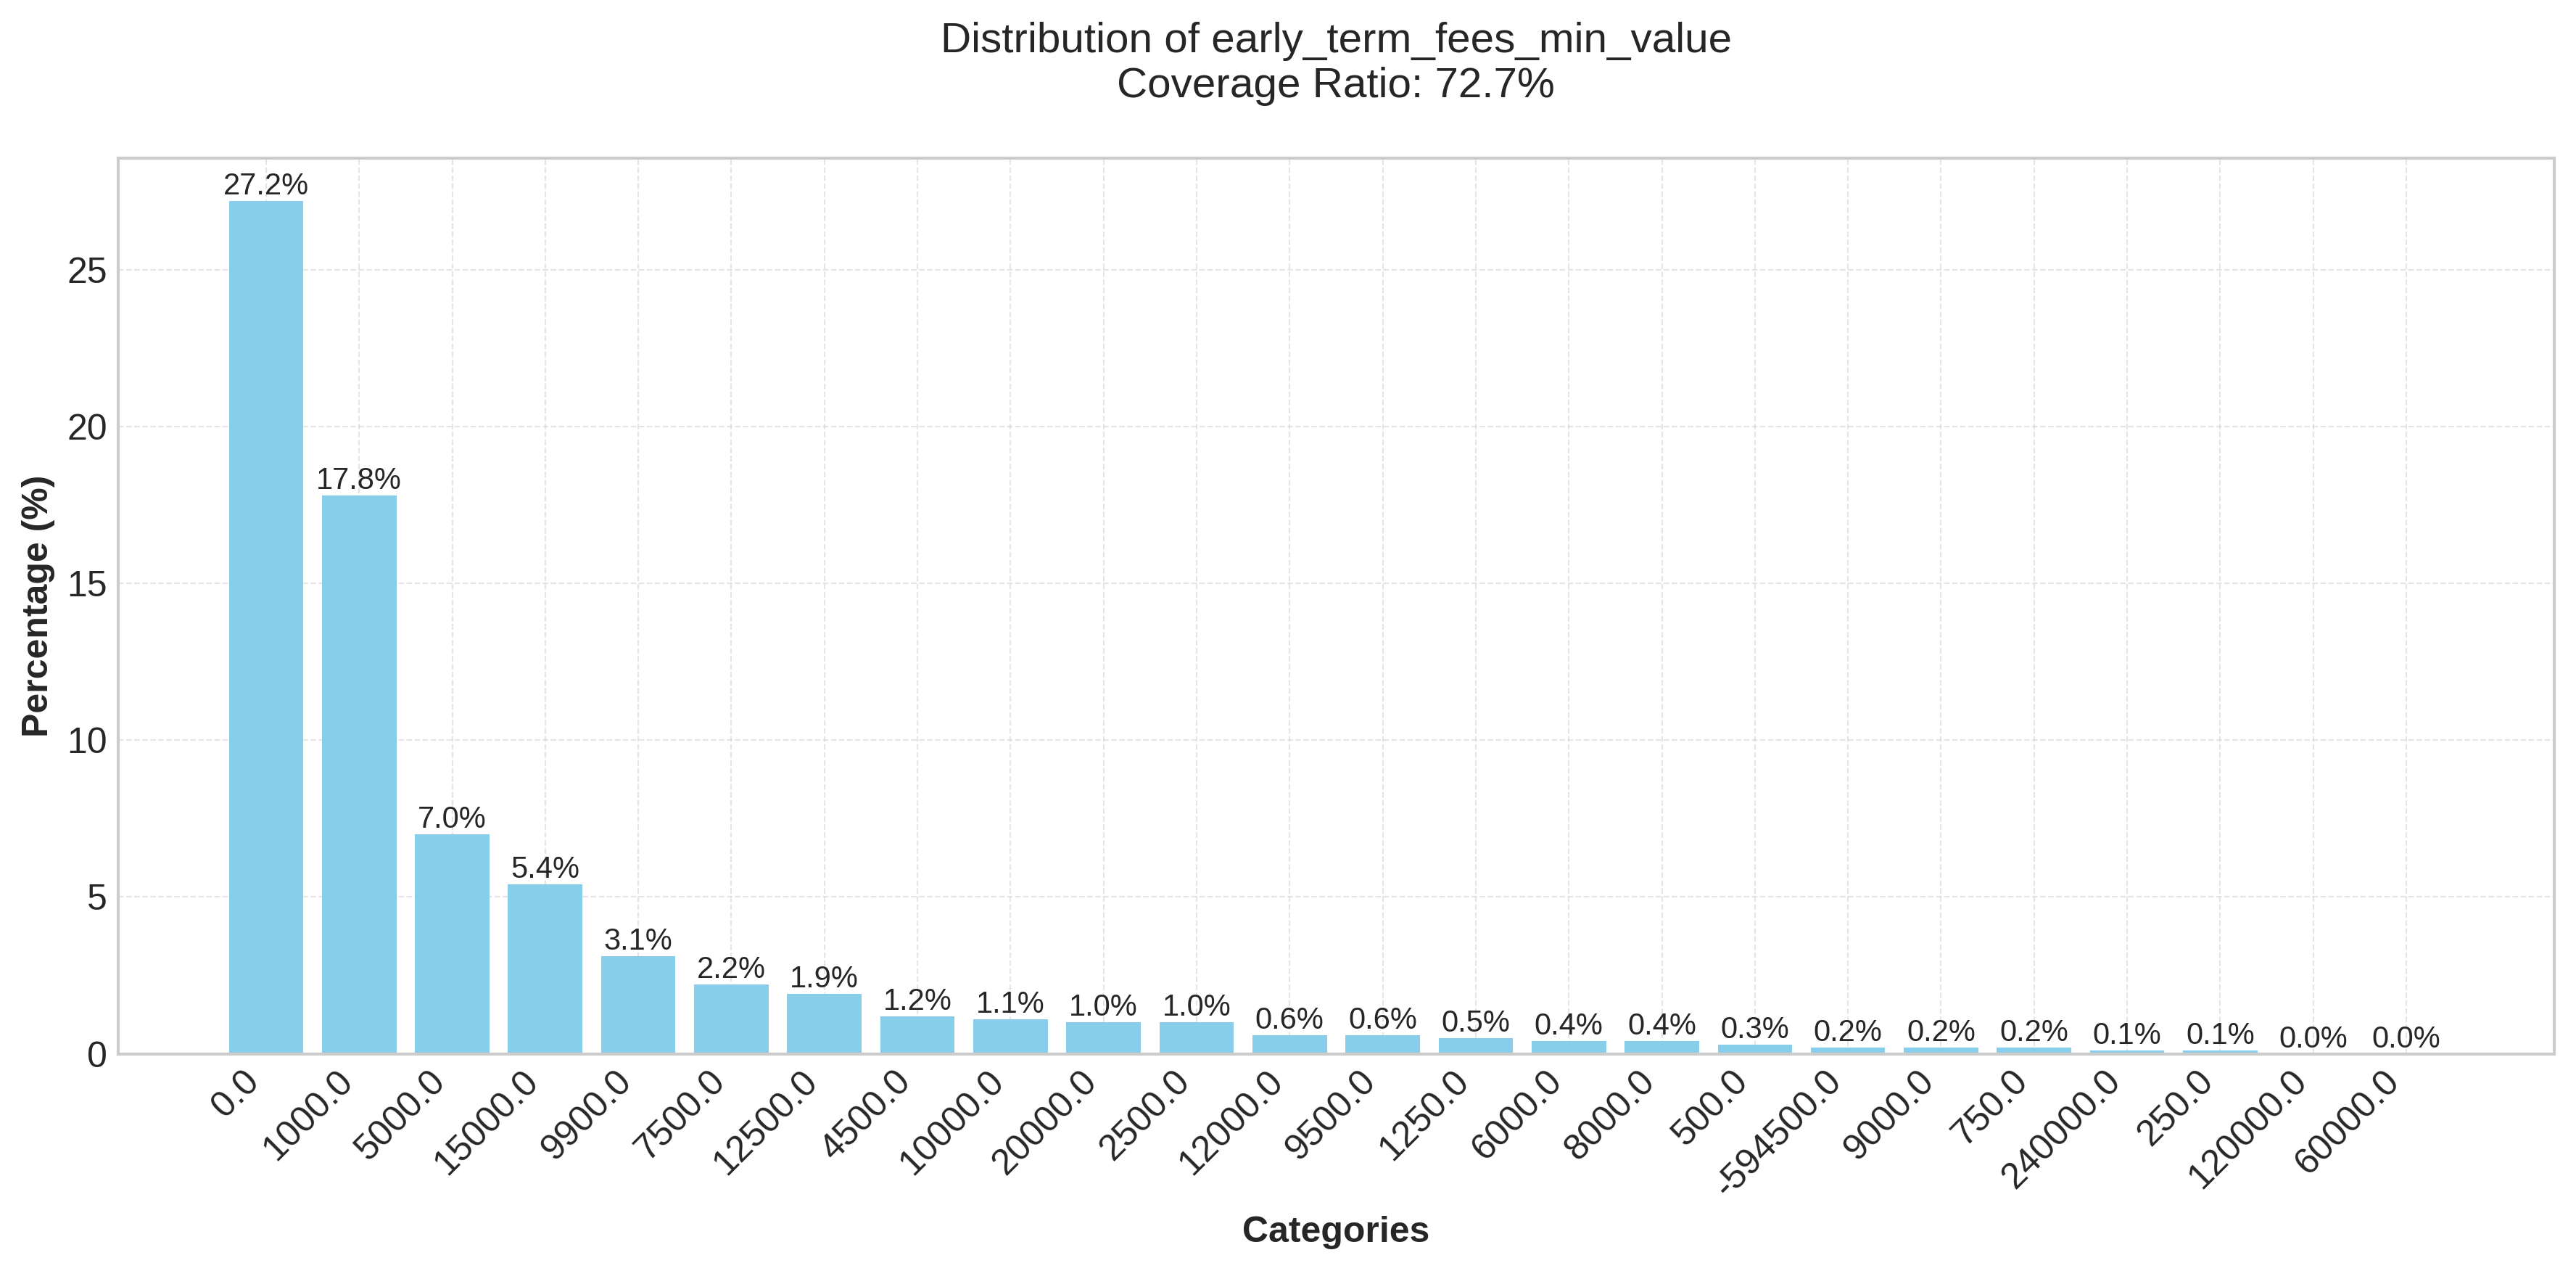

In [ ]:
# set figure style for all plots
plt.style.use('seaborn-v0_8-whitegrid')

for feature in invariant_features:
    # create figure
    fig, ax = plt.subplots(figsize=(12, 6), dpi=300)

    # get value counts and calculate percentages
    value_counts = df_filtered[feature].value_counts()
    percentages = (value_counts / len(df_filtered) * 100).round(1)

    # create bar plot
    bars = ax.bar(range(len(value_counts)), percentages, color='skyblue')

    # customize plot
    ax.set_title(f'Distribution of {feature}\nCoverage Ratio: {coverage_ratio[feature]:.1%}',
                 fontsize=14, pad=20)
    ax.set_xlabel('Categories', fontsize=12, fontweight='bold')
    ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

    # add percentage labels only
    for i, pct in enumerate(percentages):
        ax.text(i, pct, f'{pct:.1f}%',
                ha='center', va='bottom', fontsize=10)

    # add grid
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.5)

    # tight layout
    plt.tight_layout()

    # save figure
    plt.savefig(os.path.join(ANALYSIS_DIR, f"{feature}_distribution.png"),
                bbox_inches='tight',
                dpi=300)

    # display plot
    plt.show()